In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
dataset = pd.read_csv('dataset/Zameen Property Data.csv')

from pre_poccess import pre_poccess
data = pre_poccess(dataset)
pp_data = data.copy()

145742


C:\Users\H square\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\H square\OneDrive - Habib University\semester7\DS\project\Zameen-Data-exploratory-Analysis\pre_poccess.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price_z_score'][dataset['purpose'] == 'For Sale'] = z_score
C:\Users\H square\anaconda3\lib\site-packages\pandas\core\series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

date done
145618
pre-poccessed successfully.


# Exploratory Data Analysis

In [67]:
pp_data.shape

(145618, 16)

In [26]:
pp_data.dtypes

property_type              object
price                       int64
location                   object
city                       object
province_name              object
latitude                  float64
longitude                 float64
baths                       int64
area                      float64
purpose                    object
bedrooms                    int64
date_added         datetime64[ns]
agency                     object
unique_location            object
price_per_area            float64
price_z_score             float64
dtype: object

In [27]:
pp_data.nunique()

property_type         7
price              1932
location           1473
city                  5
province_name         3
latitude           7440
longitude          7896
baths                16
area                322
purpose               2
bedrooms             22
date_added          124
agency             5461
unique_location    1553
price_per_area     8970
price_z_score      9010
dtype: int64

In [28]:
pp_data.describe()

,price,latitude,longitude,baths,area,bedrooms,price_per_area,price_z_score
count,1.456180e+05,145618.000000,145618.000000,145618.000000,1.456180e+05,145618.000000,145618.000000,145618.000000
mean,1.820751e+07,29.711086,71.167552,3.312152,3.577514e+02,3.674099,67399.026487,-0.009370
std,3.394787e+07,3.828329,3.191802,2.355115,1.245425e+04,1.634092,60014.832539,0.267213
min,1.000000e+00,11.052446,25.906027,0.000000,5.000000e+00,1.000000,0.002000,-0.509490
25%,3.200000e+05,24.938913,67.129082,2.000000,1.200000e+02,3.000000,685.714286,-0.169970
50%,9.000000e+06,31.455465,73.047581,3.000000,1.900000e+02,3.000000,66221.428571,-0.066439
75%,2.000000e+07,33.550869,74.187183,5.000000,3.000000e+02,5.000000,96000.000000,0.067359
max,2.000000e+09,73.184088,80.161430,403.000000,3.111100e+06,68.000000,760000.000000,2.975219


In [29]:
pp_data.isna().sum()

property_type      0
price              0
location           0
city               0
province_name      0
latitude           0
longitude          0
baths              0
area               0
purpose            0
bedrooms           0
date_added         0
agency             0
unique_location    0
price_per_area     0
price_z_score      0
dtype: int64

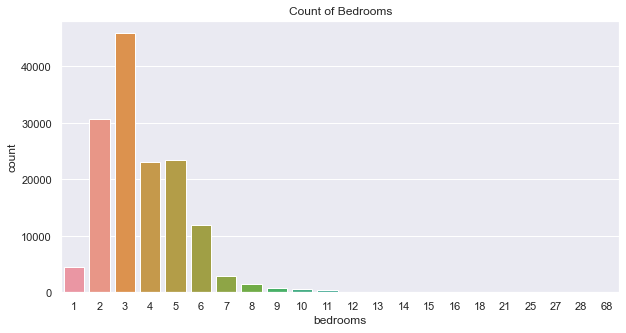

In [30]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x="bedrooms", data=pp_data).set_title('Count of Bedrooms')
plt.show()

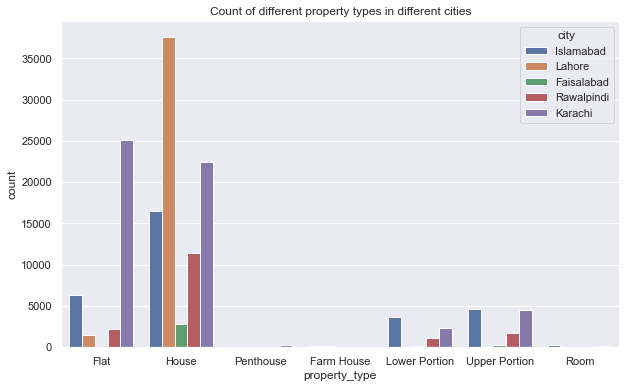

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='property_type',data=pp_data,ax=ax,hue='city').set_title('Count of different property types in different cities')
plt.show()

In [32]:
cities = pp_data.city.unique().tolist()
for i in cities:
    print("Numer of houses ads for " + i+ " city:",len(pp_data[pp_data['city']==i].index))

Numer of houses ads for Islamabad city: 31651
Numer of houses ads for Lahore city: 39425
Numer of houses ads for Faisalabad city: 3223
Numer of houses ads for Rawalpindi city: 16503
Numer of houses ads for Karachi city: 54816


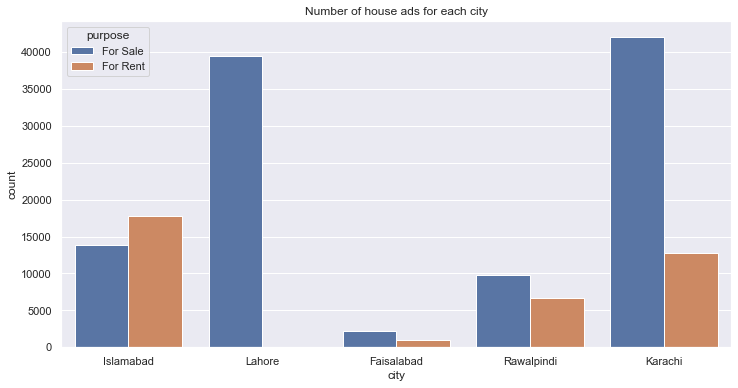

In [33]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x="city", data=pp_data,hue='purpose').set_title('Number of house ads for each city')
plt.show()

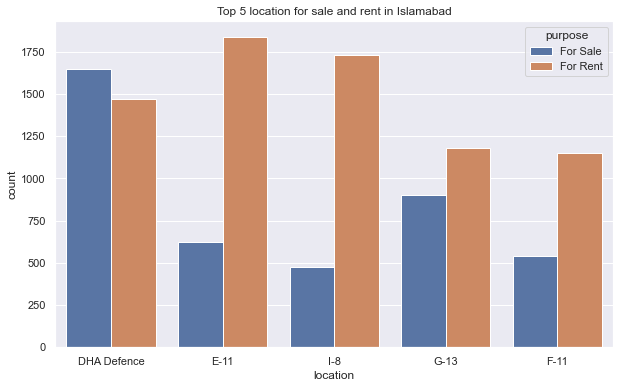

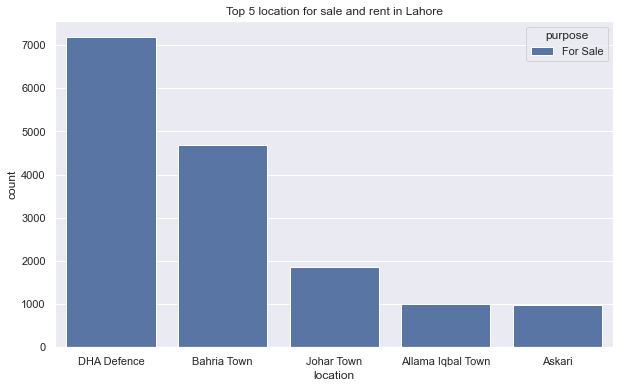

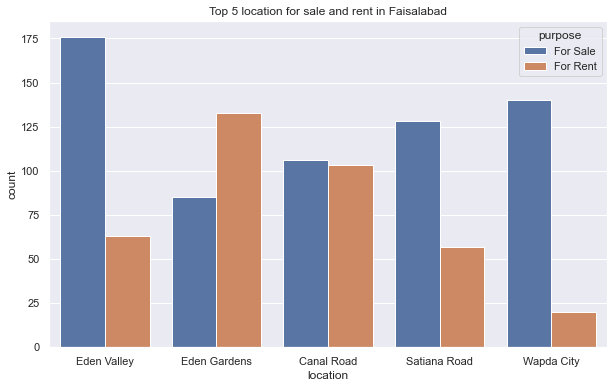

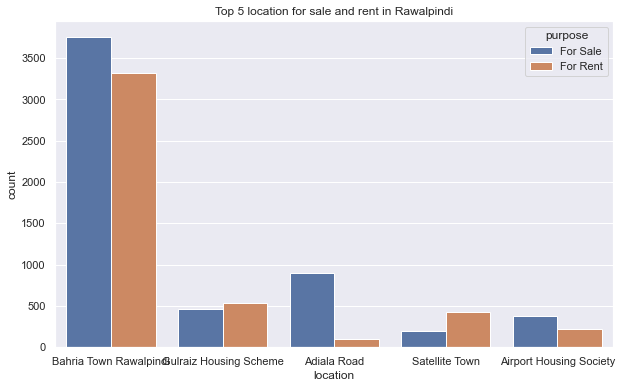

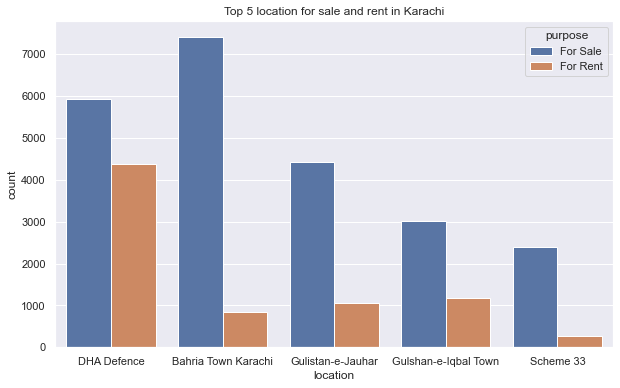

In [34]:
for i in cities:
    fig, ax = plt.subplots(figsize=(10,6))
    city_data = pp_data[pp_data['city']==i]
    sns.countplot(x='location',data=city_data,ax=ax,order=city_data.location.value_counts().iloc[:5].index,hue="purpose")
    plt.title("Top 5 location for sale and rent in "+i)
    plt.show()

In [35]:
for_sale = pp_data[pp_data['purpose'] == 'For Sale']
for_rent = pp_data[pp_data['purpose'] == 'For Rent']

print("Average Sales price for all countries in Rupees: ",int(for_sale.price.mean()))
print("Average Rent price for all countries in Rupees: ",int(for_rent.price.mean()))

Average Sales price for all countries in Rupees:  24636649
Average Rent price for all countries in Rupees:  93488


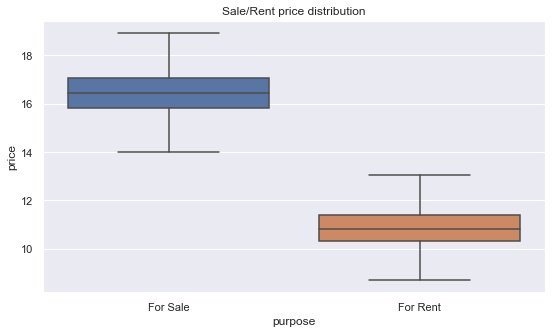

In [36]:
fig, ax = plt.subplots(figsize=(9,5))
sns.boxplot(x=pp_data.purpose,y=np.log(pp_data.price),ax=ax,showfliers=False).set_title('Sale/Rent price distribution')
plt.show()

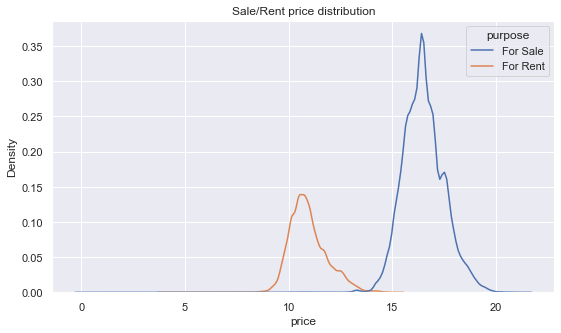

In [37]:
fig, ax = plt.subplots(figsize=(9,5))
sns.kdeplot(x=np.log(pp_data.price),hue=pp_data.purpose,ax=ax)
plt.title('Sale/Rent price distribution')
plt.show()

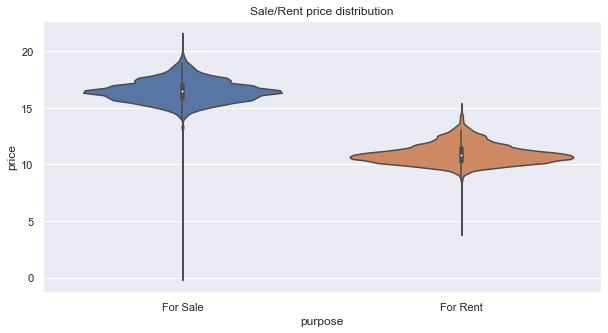

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
sns.violinplot(x=pp_data.purpose,y=np.log(pp_data.price),ax=ax).set_title('Sale/Rent price distribution')
plt.show()

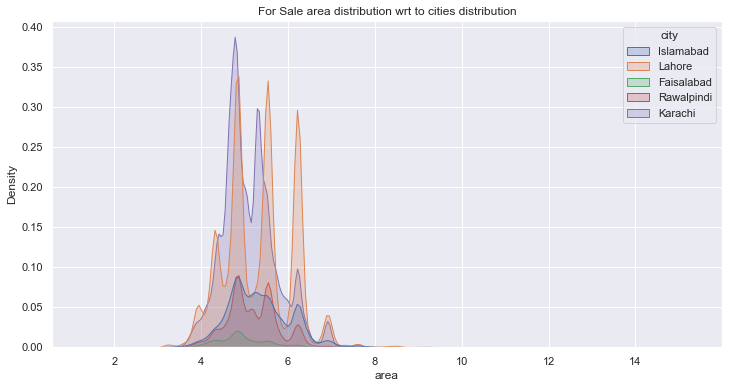

In [39]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x=np.log(for_sale.area),ax=ax,hue=for_sale.city,shade=True)
plt.title('For Sale area distribution wrt to cities distribution')
plt.show()

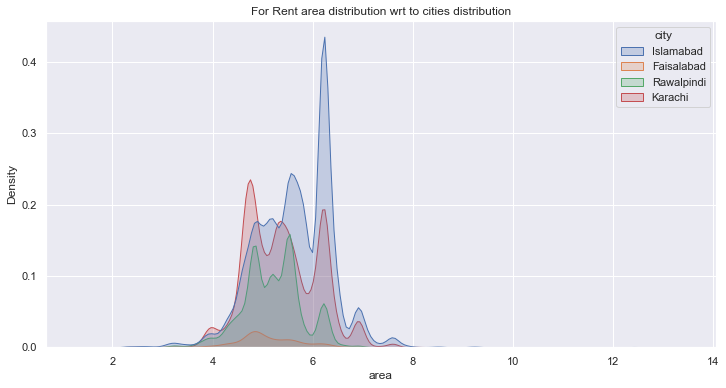

In [40]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x=np.log(for_rent.area),ax=ax,hue=for_rent.city,shade=True)
plt.title('For Rent area distribution wrt to cities distribution')
plt.show()

In [41]:
for i in cities:
    print("Average Sale Price for " +i+ " city: ",for_sale[for_sale['city'] == i].price.mean())

Average Sale Price for Islamabad city:  30050306.7273055
Average Sale Price for Lahore city:  24567814.027875714
Average Sale Price for Faisalabad city:  13781588.499550764
Average Sale Price for Rawalpindi city:  15354048.929448787
Average Sale Price for Karachi city:  25663633.343427867


In [42]:
for i in cities:
    print("Average Rent Price for " +i+ " city: ",for_rent[for_rent['city'] == i].price.mean())

Average Rent Price for Islamabad city:  109771.49836913733
Average Rent Price for Lahore city:  nan
Average Rent Price for Faisalabad city:  44079.31795386159
Average Rent Price for Rawalpindi city:  42902.690920024055
Average Rent Price for Karachi city:  101055.5450684285


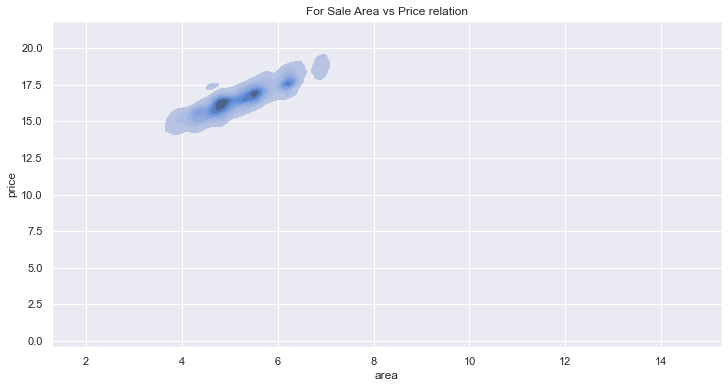

In [43]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x=np.log(for_sale.area),y=np.log(for_sale.price),ax=ax,shade=True)
plt.title('For Sale Area vs Price relation')
plt.show()

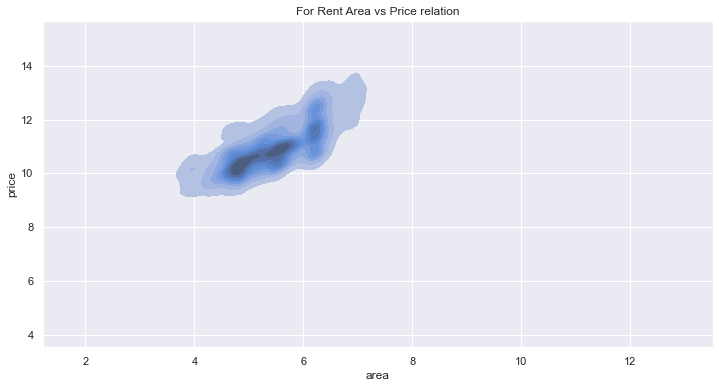

In [44]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(x=np.log(for_rent.area),y=np.log(for_rent.price),ax=ax,shade=True)
plt.title('For Rent Area vs Price relation')
plt.show()

In [45]:
print("Number of entries per year:")
pp_data['date_added'].dt.year.value_counts()

Number of entries per year:


2019    134585
2018     11033
Name: date_added, dtype: int64

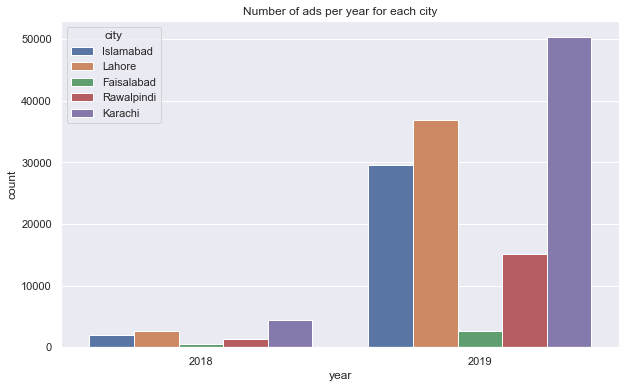

In [46]:
pp_data['year'] = pp_data['date_added'].dt.year
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x="year", data=pp_data,hue="city").set_title('Number of ads per year for each city')
plt.show()

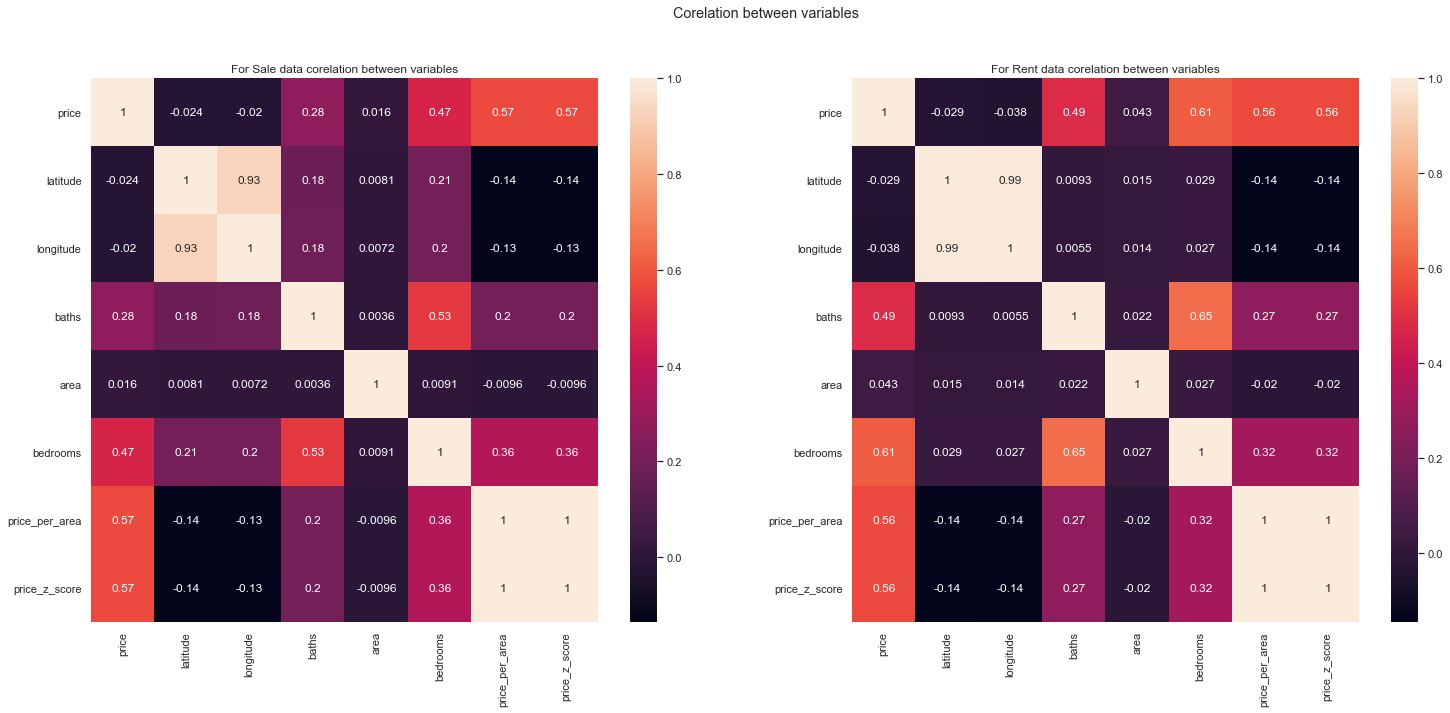

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(25,10))
sns.heatmap(for_sale.corr(),annot=True,ax=ax1).set_title('For Sale data corelation between variables')
sns.heatmap(for_rent.corr(),annot=True,ax=ax2).set_title('For Rent data corelation between variables')
plt.suptitle('Corelation between variables')
plt.show()

# Questions and Analysis

In [48]:
pp_data = pp_data.drop(pp_data[(pp_data['property_type'] == "Room") | (pp_data['property_type'] == "Penthouse") |  (pp_data['property_type'] == "Farm House")].index)
pp_data['property_type'][pp_data['property_type'] =='Upper Portion'] = "Portion"
pp_data['property_type'][pp_data['property_type'] == 'Lower Portion'] = "Portion"

<ipython-input-48-941d64eb9f9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_data['property_type'][pp_data['property_type'] =='Upper Portion'] = "Portion"
<ipython-input-48-941d64eb9f9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pp_data['property_type'][pp_data['property_type'] == 'Lower Portion'] = "Portion"


## Q1) Difference in property type across sale and rent

### Ad posted for different property types and purposes

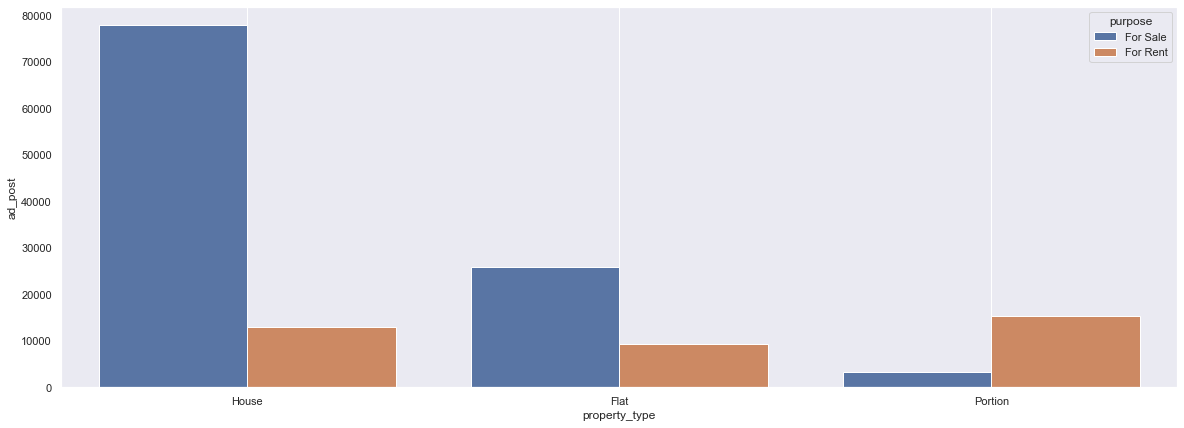

In [49]:
relevant_data = pp_data[['province_name', 'price', 'price_per_area', 'city', 'purpose', 'property_type', 'date_added', 'area']].copy()

relevant_data['month'] = pd.DatetimeIndex(pp_data['date_added']).month
relevant_data['year'] = pd.DatetimeIndex(pp_data['date_added']).year
relevant_data['date'] = pd.to_datetime(relevant_data['month'].astype(str) + "-"+ relevant_data['year'].astype(str))
relevant_data['ad_post'] = 1


relevant_data.sort_values(by = ['date_added'], inplace = True)
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
plot = sns.barplot(x = 'property_type', y = 'ad_post', hue = 'purpose', estimator = np.sum, data = relevant_data, ax = ax)
#plot.set(yscale = 'log')
plt.grid()
plt.show()

In [50]:
print(relevant_data.head(2))

      province_name     price  price_per_area    city   purpose property_type  \
12808        Punjab  26000000   104000.000000  Lahore  For Sale         House   
12135        Punjab  46500000    66428.571429  Lahore  For Sale         House   

      date_added   area  month  year       date  ad_post  
12808 2018-08-05  250.0      8  2018 2018-08-01        1  
12135 2018-08-05  700.0      8  2018 2018-08-01        1  


### Property type for different cities

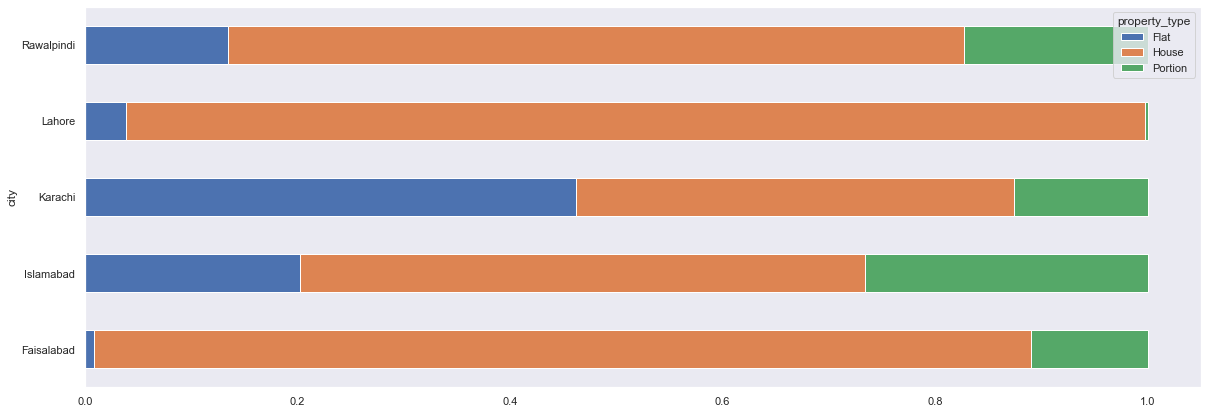

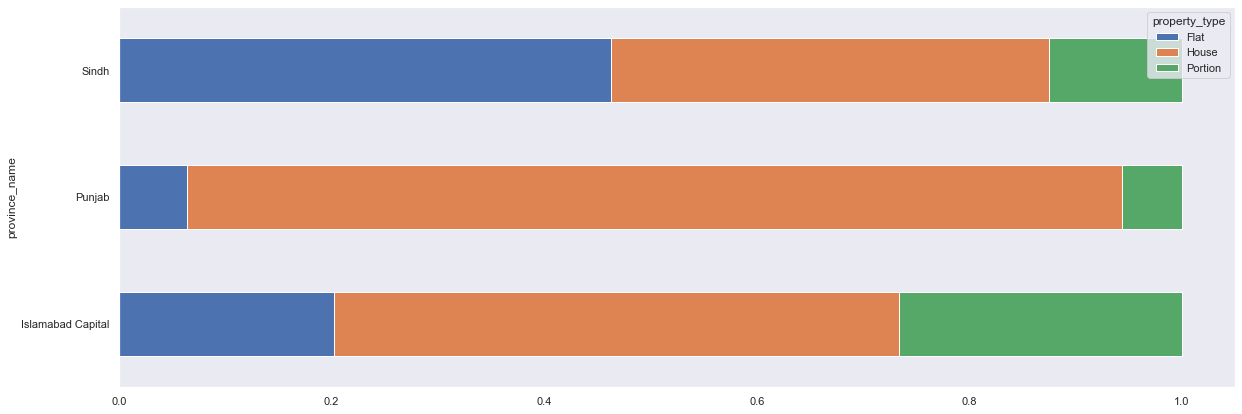

In [51]:
df_plot = relevant_data.groupby(['property_type', 'city']).size().reset_index().pivot(columns='property_type', index='city', values=0)
df_plot["sum"] = df_plot.sum(axis=1)
df_plot = df_plot.loc[:,"Flat":"Portion"].div(df_plot["sum"], axis=0)
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot.plot(kind='barh', stacked=True, ax = ax)
ax.grid()

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
df_plot = relevant_data.groupby(['property_type', 'province_name']).size().reset_index().pivot(columns='property_type', index='province_name', values=0)
df_plot["sum"] = df_plot.sum(axis=1)
df_plot = df_plot.loc[:,"Flat":"Portion"].div(df_plot["sum"], axis=0)
df_plot.plot(kind='barh', stacked=True, ax = ax)
ax.grid()
plt.show()

### Property type for different provinces

Index(['property_type', 'province_name', 'For Rent', 'For Sale'], dtype='object', name='purpose')


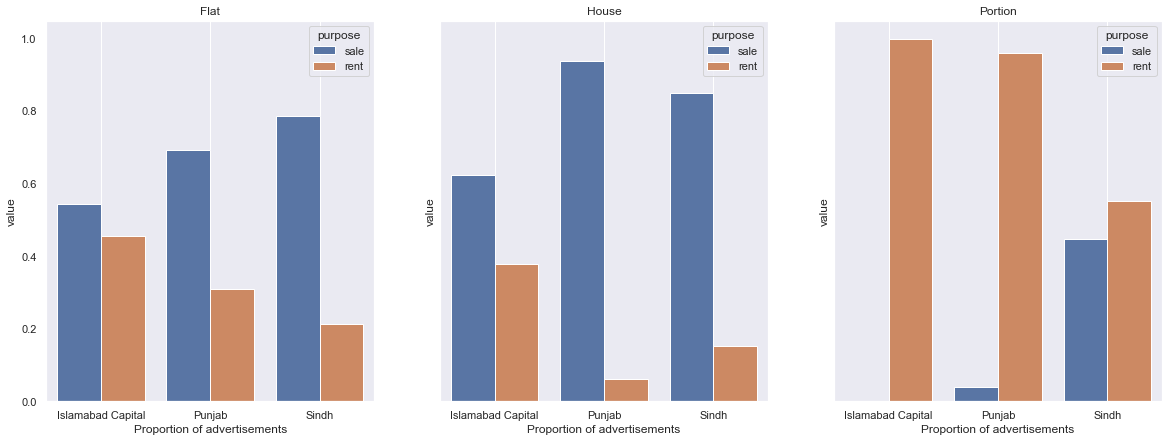

In [52]:
df_plot = relevant_data.groupby(['property_type', 'province_name', 'purpose']).size().reset_index()

dfout = df_plot.set_index(['property_type','province_name','purpose']).unstack()[0].reset_index()
print(dfout.columns)
dfout["sum"] = dfout.sum(axis=1)
dfout['sale'] = dfout['For Sale']/dfout['sum']
dfout['rent'] = dfout['For Rent']/dfout['sum']

df = pd.melt(dfout, id_vars=['property_type', 'province_name'], value_vars=['sale', 'rent'])

fig, ax = plt.subplots(1, 3, sharey = True, sharex = True, figsize = (20, 7))
count = 0
for i in df_plot['property_type'].unique():
    sns.barplot(x = 'province_name', y = 'value', hue = 'purpose', data = df[df['property_type'] == i], ax = ax[count])
    ax[count].set_title(i)
    ax[count].set_xlabel("Proportion of advertisements")
    ax[count].grid()
    count += 1
    





## Q2) Analyzing the recovery period of rent with respect to the selling price of a property

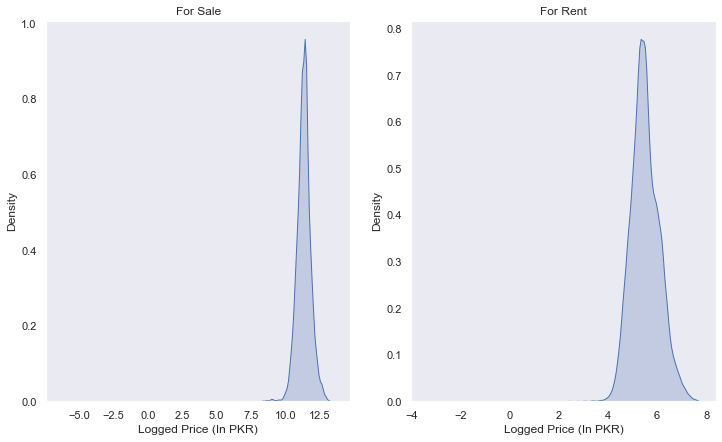

In [53]:
# Share a Y axis with each row of subplots
fig, ax = plt.subplots(1, 2, figsize = (12, 7))

sns.kdeplot(np.log(pp_data['price_per_area'][pp_data['purpose'] == 'For Sale']), shade = True, ax = ax[0], label = "Sale")
sns.kdeplot(np.log(pp_data['price_per_area'][pp_data['purpose'] == 'For Rent']), shade = True, ax = ax[1], label = "Rent")
ax[0].set_xlabel("Logged Price (In PKR)")
ax[0].title.set_text("For Sale")
ax[1].set_xlabel("Logged Price (In PKR)")
ax[1].title.set_text("For Rent")
ax[0].grid();ax[1].grid();
plt.show()

In [54]:
## computing rent per area
location_sale_rent = {}
for i, row in pp_data.iterrows():
    location = row['unique_location'].strip().lower()
    price_per_area = row['price_per_area']
    purpose = row['purpose']
    if location not in location_sale_rent:
        location_sale_rent[location] = {'For Sale':[], 'For Rent':[]}
    location_sale_rent[location][purpose].append(price_per_area)

mean_loc_sale_rent = {}

#computing mean rent per area
for i in location_sale_rent:
    for_sale = location_sale_rent[i]['For Sale']
    for_rent = location_sale_rent[i]['For Rent']
    if (len(for_sale) + len(for_rent)) >= 0 and len(for_sale) > 0 and len(for_rent) > 0:
        if i not in mean_loc_sale_rent:
            mean_loc_sale_rent[i] = {'sale': 0, 'rent' : 0, 'city':''}
        mean_loc_sale_rent[i]['sale'] = np.mean(for_sale)
        mean_loc_sale_rent[i]['rent'] = np.mean(for_rent)
        mean_loc_sale_rent[i]['city'] = i.split()[-1].capitalize()
        #for a partiular location, the dictionary holds the mean rent and sale price
            
print(len(mean_loc_sale_rent))
mean_location = pd.DataFrame.from_dict(mean_loc_sale_rent, orient = 'index')
mean_location['ratio_per_month'] = np.floor(mean_location['sale'] / mean_location['rent'], dtype = 'float64')
mean_location['ratio_per_year'] = (mean_location['ratio_per_month']/12)



mean_location.head(10)    

545


,sale,rent,city,ratio_per_month,ratio_per_year
g-10 islamabad,127055.868629,276.275888,Islamabad,459.0,38.250000
e-11 islamabad,109492.071479,330.342832,Islamabad,331.0,27.583333
g-15 islamabad,72481.624132,192.703404,Islamabad,376.0,31.333333
bani gala islamabad,60754.509271,151.817360,Islamabad,400.0,33.333333
dha defence islamabad,62812.532723,158.795754,Islamabad,395.0,32.916667
ghauri town islamabad,69987.972311,169.681040,Islamabad,412.0,34.333333
korang town islamabad,64632.491484,152.521836,Islamabad,423.0,35.250000
diplomatic enclave islamabad,194558.954809,822.279687,Islamabad,236.0,19.666667
b-17 islamabad,62074.557139,181.678173,Islamabad,341.0,28.416667
g-11 islamabad,123151.002533,280.434778,Islamabad,439.0,36.583333


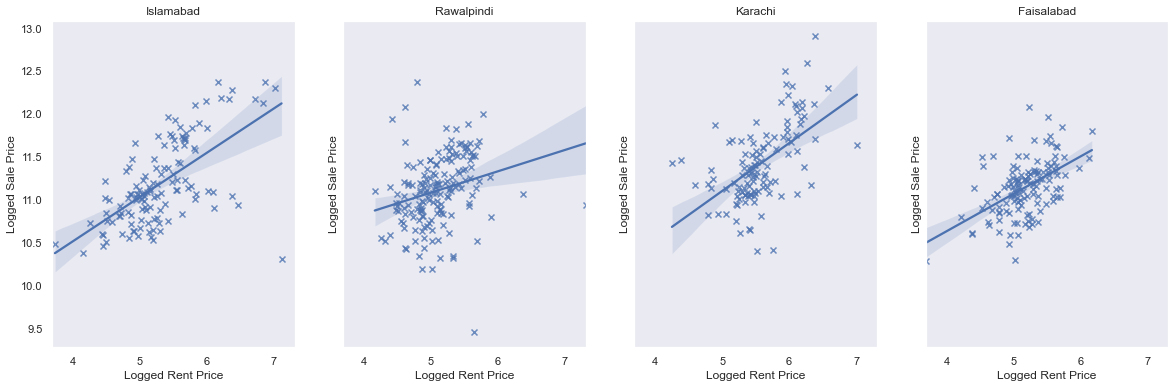

In [55]:
mean_location['logged_sale'] = np.log(mean_location['sale'])
mean_location['logged_rent'] = np.log(mean_location['rent'])


cities = list(set(mean_location['city']))
fig, ax = plt.subplots(1, 4, sharex = True, sharey = True, figsize = (20, 6))
count = 0
for i in cities:
    #sns.kdeplot(data = mean_location[['logged_rent', 'logged_sale']][mean_location['city'] == i], ax = ax[count], thresh = 0.0)
    #sns.scatterplot( x = mean_location['logged_sale'][mean_location['city'] == i], y = mean_location['logged_rent'][mean_location['city'] == i], ax = ax[count])
    sns.regplot( y = mean_location['logged_sale'][mean_location['city'] == i], x = mean_location['logged_rent'][mean_location['city'] == i], ax = ax[count], marker = 'x')
    ax[count].set_title(i)
    ax[count].set_xlabel("Logged Rent Price")
    ax[count].set_ylabel("Logged Sale Price")
    ax[count].grid()
    count += 1
plt.show()
    

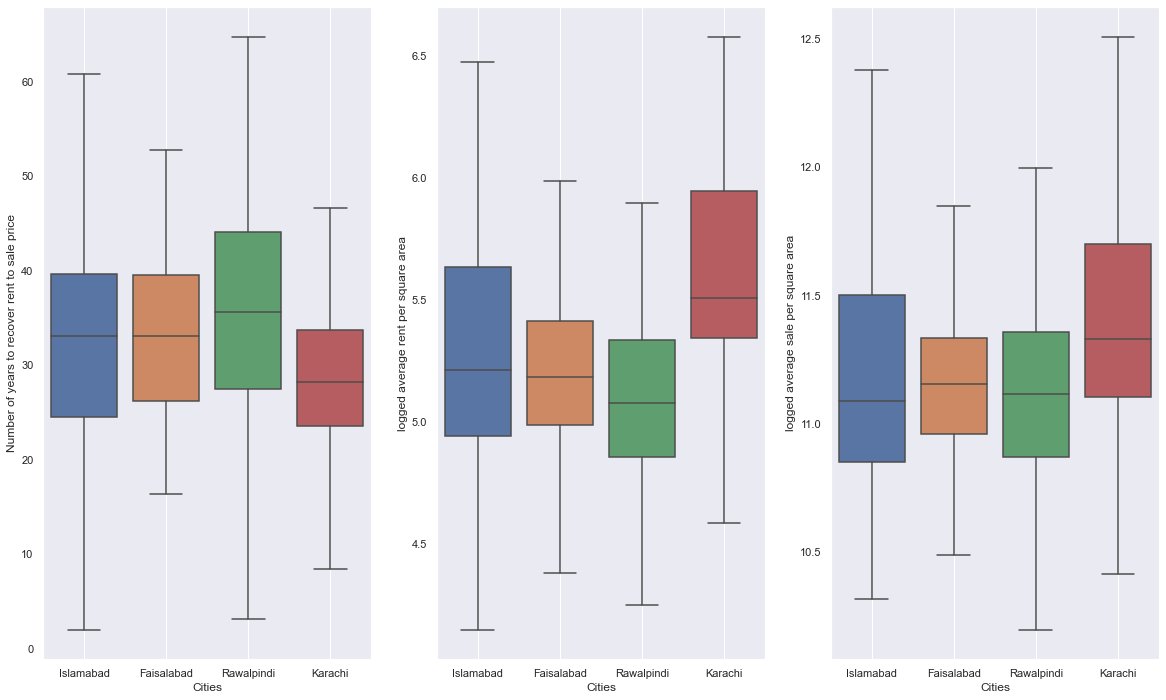

In [56]:
mean_location = mean_location.drop(mean_location[(mean_location['ratio_per_year'] < 2) | (mean_location['ratio_per_year'] > 80)].index)


fig, ax = plt.subplots(1, 3,figsize = (20, 12))
sns.boxplot(y = 'ratio_per_year', x = 'city', data = mean_location, showfliers=False, ax = ax[0])
ax[0].set_xlabel('Cities')
ax[0].set_ylabel("Number of years to recover rent to sale price")
ax[0].grid()

sns.boxplot(y = np.log(mean_location['rent']), x = mean_location['city'], showfliers=False, ax = ax[1])
ax[1].set_xlabel('Cities')
ax[1].set_ylabel("logged average rent per square area")
ax[1].grid()

sns.boxplot(y = np.log(mean_location['sale']), x = mean_location['city'], showfliers=False, ax = ax[2])
ax[2].set_xlabel('Cities')
ax[2].set_ylabel("logged average sale per square area")
ax[2].grid()

plt.show()

### Q3) The factor on which price depends the most

In [57]:
relevant_data = pp_data[['price', 'price_per_area', 'unique_location', 'city', 'area', 'bedrooms', 'purpose', 'property_type']].copy()
sale = relevant_data[relevant_data['purpose'] == 'For Sale']
rent = relevant_data[relevant_data['purpose'] == 'For Rent']

<ipython-input-58-9e2ee7d71ea3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale['price'] = min_max_scaler.fit_transform(np.reshape(sale['price'].values, (-1, 1)))
<ipython-input-58-9e2ee7d71ea3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent['price'] = min_max_scaler.fit_transform(np.reshape(rent['price'].values, (-1, 1)))
<ipython-input-58-9e2ee7d71ea3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

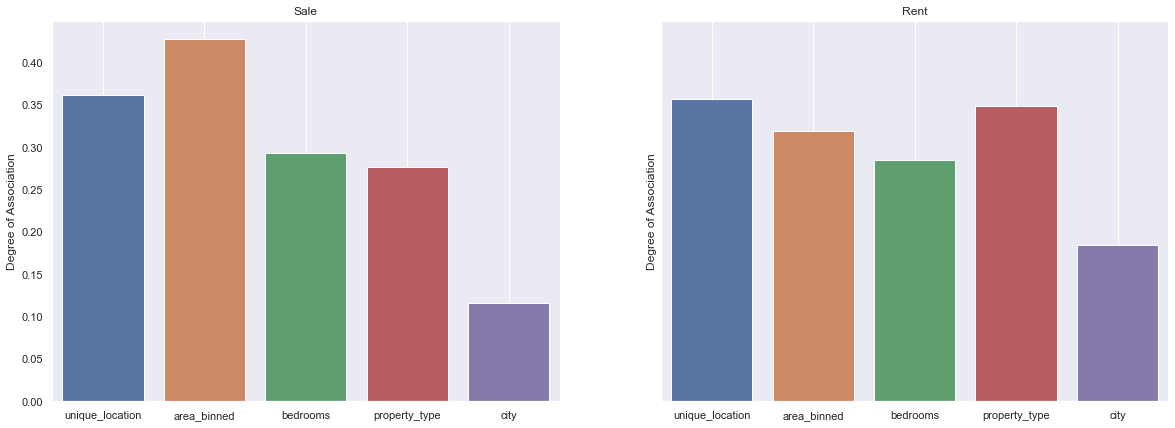

In [58]:
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
import scipy.stats as ss

#going with standard because we have massive outliears :(
min_max_scaler = preprocessing.StandardScaler()

sale['price'] = min_max_scaler.fit_transform(np.reshape(sale['price'].values, (-1, 1)))
rent['price'] = min_max_scaler.fit_transform(np.reshape(rent['price'].values, (-1, 1)))


sale['price_per_area'] = min_max_scaler.fit_transform(np.reshape(sale['price_per_area'].values, (-1, 1)))
rent['price_per_area'] = min_max_scaler.fit_transform(np.reshape(rent['price_per_area'].values, (-1, 1)))

sale['area'] = min_max_scaler.fit_transform(np.reshape(sale['area'].values, (-1, 1)))
rent['area'] = min_max_scaler.fit_transform(np.reshape(rent['area'].values, (-1, 1)))

                     
est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(sale['price'].values, (-1, 1)))
sale['price_binned'] = binned
#print(sale['price_binned'].value_counts())

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(sale['area'].values, (-1, 1)))
sale['area_binned'] = binned

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(rent['price'].values, (-1, 1)))
rent['price_binned'] = binned
#print(sale['price_binned'].value_counts())

est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned = est.fit_transform(np.reshape(rent['area'].values, (-1, 1)))
rent['area_binned'] = binned


#FTW https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

dfs = [sale, rent]
labels = ['Sale', 'Rent']
columns = ['unique_location', 'area_binned', 'bedrooms', 'property_type', 'city']


fig, ax = plt.subplots(1, 2, sharey = True, figsize = (20, 7))

for i in range(2):
    scores = []
    a = dfs[i]['price_binned']
    label = labels[i]
    for b in columns:
        b = dfs[i][b]
        scores.append(cramers_v(pd.crosstab(a, b).values))
        
    sns.barplot(x = columns, y = scores, ax = ax[i])
    ax[i].grid()
    ax[i].set_title(label)
    ax[i].set_ylabel("Degree of Association") 

### Q4) Difference between price across cities

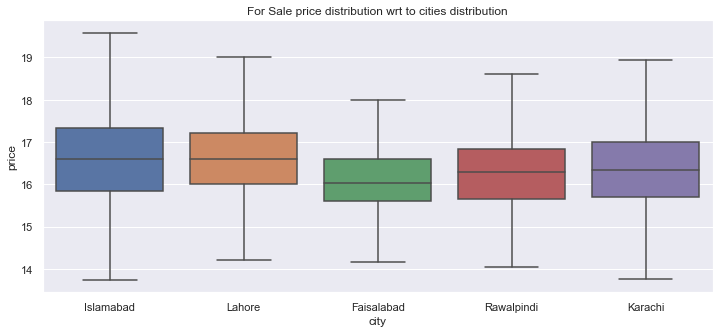

In [61]:
for_sale = pp_data[pp_data['purpose'] == 'For Sale']
for_rent = pp_data[pp_data['purpose'] == 'For Rent']

fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(x=for_sale.city,y=np.log(for_sale.price),ax=ax,showfliers=False).set_title('For Sale price distribution wrt to cities distribution')
plt.show()

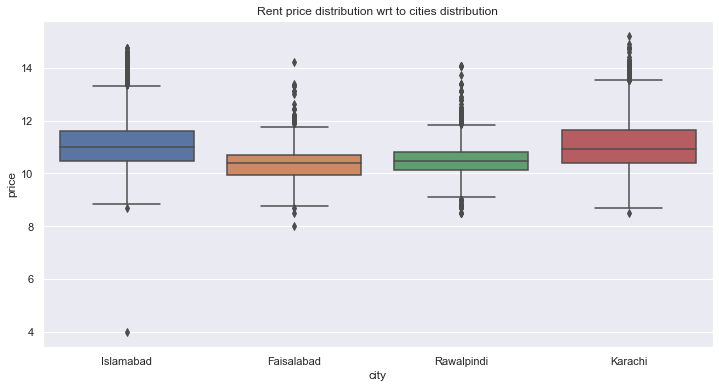

In [62]:
fig, ax = plt.subplots(figsize=(12,6))
sns.boxplot(x=for_rent.city,y=np.log(for_rent.price),ax=ax).set_title('Rent price distribution wrt to cities distribution')
plt.show()

## Q5 Trend for property type changing with time

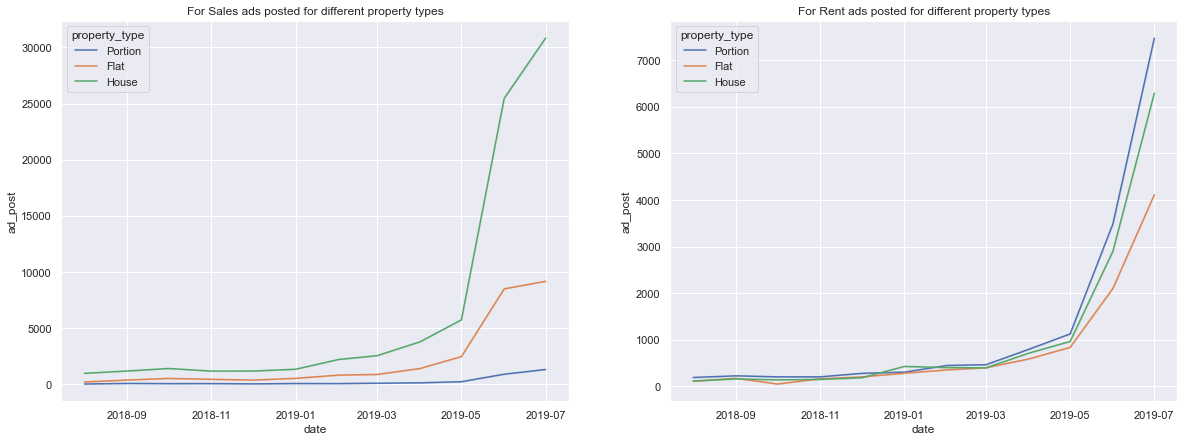

In [63]:
pp_data['date_added'] = pd.to_datetime(pp_data['date_added'])


relevant_data = pp_data[['price', 'price_per_area', 'city', 'purpose', 'property_type', 'date_added']].copy()

relevant_data['month'] = pd.DatetimeIndex(pp_data['date_added']).month
relevant_data['year'] = pd.DatetimeIndex(pp_data['date_added']).year
relevant_data['date'] = pd.to_datetime(relevant_data['month'].astype(str) + "-"+ relevant_data['year'].astype(str))
relevant_data['ad_post'] = 1


relevant_data.sort_values(by = ['date_added'], inplace = True)

sale = relevant_data[relevant_data['purpose'] == 'For Sale']
rent = relevant_data[relevant_data['purpose'] == 'For Rent']

hue_order = list(set(pp_data['property_type']))

fig, ax = plt.subplots(1, 2, figsize = (20, 7))
sns.lineplot(x = 'date', y = 'ad_post', data = sale, hue = 'property_type', hue_order = hue_order, estimator = np.sum, markers = True, ax = ax[0]).set_title('For Sales ads posted for different property types')
plt.grid()

sns.lineplot(x = 'date', y = 'ad_post', data = rent, hue = 'property_type', hue_order = hue_order, estimator = np.sum, markers = True, ax = ax[1]).set_title('For Rent ads posted for different property types')
plt.grid()
plt.show()

##THIS MAKES US REALIZE THAT OUR ANALYSIS GOING FORWARD SHOULD BE TIME INDEPENDENT

types = list(set(relevant_data['property_type']))

sales_property_ratio = {}

for i, row in sale.iterrows():
    date = row['date']
    ptype = row['property_type']
    if date not in sales_property_ratio:
        sales_property_ratio[date] = {i:0 for i in types}
    if ptype in types:
        sales_property_ratio[date][ptype] += 1
    else:
        sales_property_ratio[date]["Other"] += 1
    
    
for i in sales_property_ratio:
    total = sum(list(sales_property_ratio[i].values()))
    for j in types:
        sales_property_ratio[i][j] /= total

    
rent_property_ratio = {}

for i, row in rent.iterrows():
    date = row['date']
    ptype = row['property_type']
    if date not in rent_property_ratio:
        rent_property_ratio[date] = {i:0 for i in types}
    if ptype in types:
        rent_property_ratio[date][ptype] += 1
    else:
        rent_property_ratio[date]["Other"] += 1
    
    
for i in rent_property_ratio:
    total = sum(list(rent_property_ratio[i].values()))
    for j in types:
        rent_property_ratio[i][j] /= total
    
        


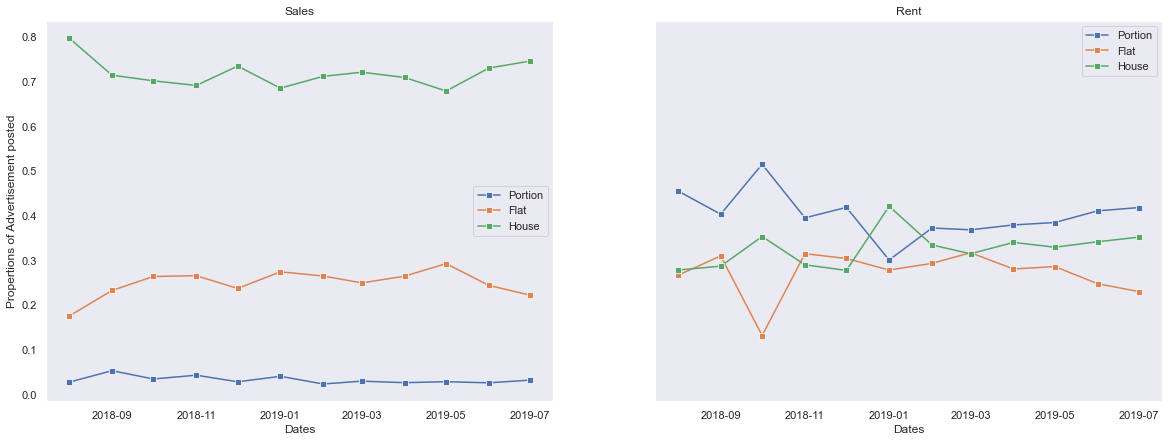

In [64]:
sales_property = pd.DataFrame.from_dict(sales_property_ratio, orient = 'index')
rents_property = pd.DataFrame.from_dict(rent_property_ratio, orient = 'index')
dfs = [(sales_property, "Sales"), (rents_property, "Rent")]
fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (20, 7))

for i in range(2):
    data = dfs[i][0]
    for ptype in types:
        if ptype == "Other":
            continue
        sns.lineplot(x = data.index, y = (data[ptype]), label = ptype, ax = ax[i], marker = 's')
    ax[i].legend()
    ax[i].grid()
    ax[i].set_title(dfs[i][1])
    ax[i].set_xlabel("Dates")
    ax[i].set_ylabel("Propertions of Advertisement posted")
plt.show()

## Data Clustering

In [65]:
from sklearn.cluster import KMeans, DBSCAN
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

In [83]:
numer = set(data.corr()['price'].index)
categ = list(set(data.columns) - set(data.corr()['price'].index))
data_log = data.copy()
# data_log.drop(data.price_z_score)
# data_log = data_log[(data_log.T != 0).any()]
data_log = data_log [(data_log  != 0).all(1)]

for i in numer:
    data_log[i] = np.log(data_log[i])
    
data_isl = data_log[data_log['city'] == "Islamabad"]
data_lhr = data_log[data_log['city'] == "Lahore"]
data_fsl = data_log[data_log['city'] == "Faisalabad"]
data_rwl = data_log[data_log['city'] == "Rawalpindi"]
data_khi = data_log[data_log['city'] == "Karachi"]    

C:\Users\H square\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [79]:
def kmeans(input_data, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(input_data)
    km = KMeans(n_clusters=n_clusters)
    km.fit(input_data)
    y_pred = km.predict(input_data)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X[:,0], X[:,1],c=y_pred, s=50)
    ax.set_xlim(-3,3)
    ax.set_xlabel(input_data.columns[0])
    ax.set_ylabel(input_data.columns[1])
    ax.set_title("K-means")
    plt.colorbar(scatter)
    plt.show()
    print('distance of each model from its centroid: ',km.inertia_)
    return y_pred, km.cluster_centers_

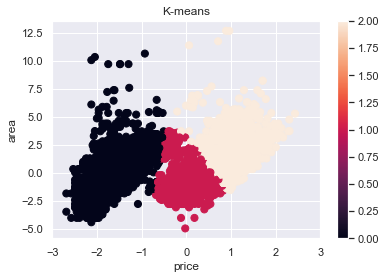

distance of each model from its centroid:  100451.85457753988


(array([1, 1, 1, ..., 1, 2, 1]),
 array([[10.93659333,  5.448002  ],
        [15.86109186,  4.77030989],
        [17.39293377,  5.8661335 ]]))

In [80]:
kmeans(data_log[['price', 'area']],3)

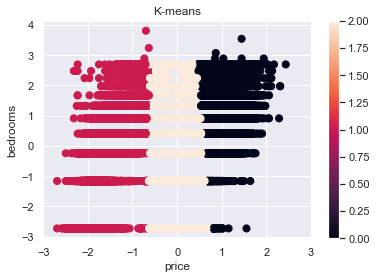

distance of each model from its centroid:  76382.3700837165


(array([2, 2, 0, ..., 2, 2, 2]),
 array([[17.36015676,  1.55762784],
        [10.93297177,  1.07031416],
        [15.82415623,  1.01931403]]))

In [81]:
kmeans(data_log[['price', 'bedrooms']],3)

Islamabad


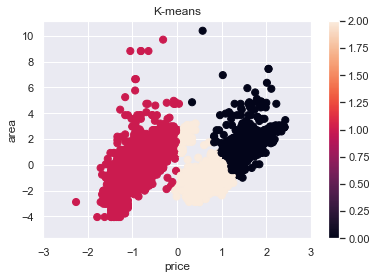

distance of each model from its centroid:  31115.48148692134


(array([2, 2, 2, ..., 1, 1, 1]),
 array([[17.62049335,  6.01153686],
        [11.05188649,  5.59573691],
        [15.91373524,  4.91399617]]))

In [84]:
i = 0
cities = ['Islamabad','Lahore','Faisalabad','Rawalpindi','Karachi']

print(cities[i])
kmeans(data_isl[['price', 'area']],3)

Lahore


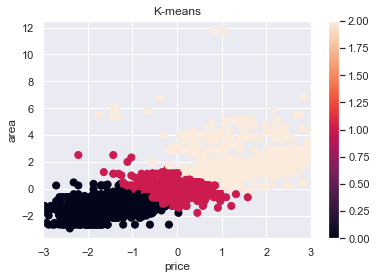

distance of each model from its centroid:  11970.84074679558


(array([2, 2, 1, ..., 1, 2, 2]),
 array([[15.49820501,  4.41067924],
        [16.60748019,  5.2306978 ],
        [17.6829978 ,  6.32214456]]))

In [85]:
i = i+1
print(cities[i])
kmeans(data_lhr[['price', 'area']],3)

Faisalabad


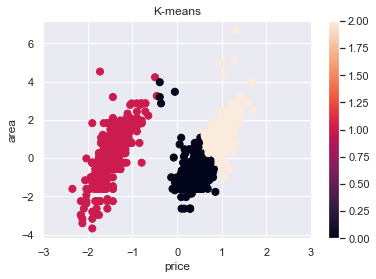

distance of each model from its centroid:  1503.1248439906758


(array([0, 2, 0, ..., 0, 2, 1]),
 array([[15.61937019,  4.60566862],
        [10.36073585,  5.07476748],
        [16.89321798,  5.63320553]]))

In [86]:
i = i+1
print(cities[i])
kmeans(data_fsl[['price', 'area']],3)

Rawalpindi


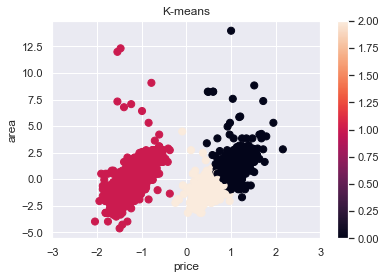

distance of each model from its centroid:  7423.993743114203


(array([0, 0, 0, ..., 0, 2, 2]),
 array([[16.87376478,  5.63100149],
        [10.46368574,  5.21963019],
        [15.59302297,  4.72384242]]))

In [87]:
i = i+1
print(cities[i])
kmeans(data_rwl[['price', 'area']],3)

Karachi


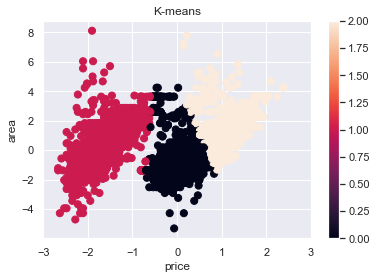

distance of each model from its centroid:  38070.70085851802


(array([2, 2, 2, ..., 0, 2, 0]),
 array([[15.86409248,  4.80749164],
        [11.05844221,  5.37914158],
        [17.57603092,  5.73688621]]))

In [88]:
i = i+1
print(cities[i])
kmeans(data_khi[['price', 'area']],3)

In [89]:
# data_choose = data_log[['price', 'bedrooms', 'baths', 'area', 'price_per_area']]
data_group = data_log.groupby('unique_location').mean()
data_choose = data_group[['price', 'bedrooms', 'area', 'price_per_area']]
data_new_choose = data_group[['price', 'bedrooms', 'area']]

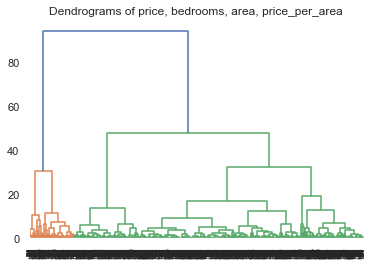

In [90]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area, price_per_area")  
dend = shc.dendrogram(shc.linkage(data_choose, method='ward'))


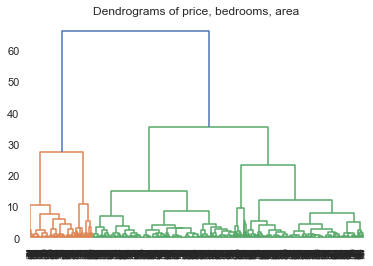

In [91]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area")  
dend = shc.dendrogram(shc.linkage(data_new_choose, method='ward'))

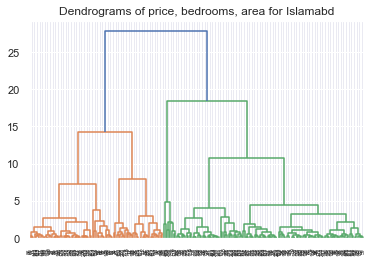

In [92]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area for Islamabd")  
dend = shc.dendrogram(shc.linkage(data_isl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']], method='ward'))

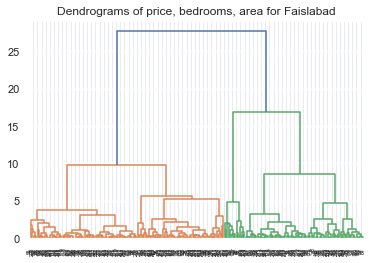

In [93]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area for Faislabad")  
dend = shc.dendrogram(shc.linkage(data_fsl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']], method='ward'))

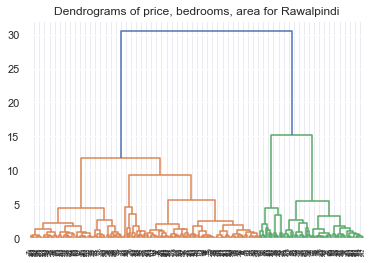

In [94]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area for Rawalpindi")  
dend = shc.dendrogram(shc.linkage(data_rwl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']], method='ward'))

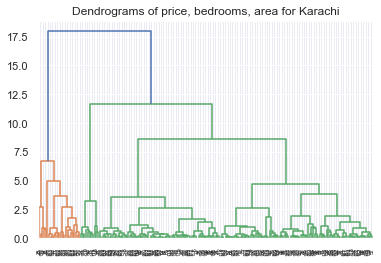

In [95]:
fig = plt.figure()
# plt.figure(figsize=(10, 7))  
plt.title("Dendrograms of price, bedrooms, area for Karachi")  
dend = shc.dendrogram(shc.linkage(data_khi.groupby('unique_location').mean()[['price', 'bedrooms', 'area']], method='ward'))

distance of each model from its centroid:  1486.3634764571525


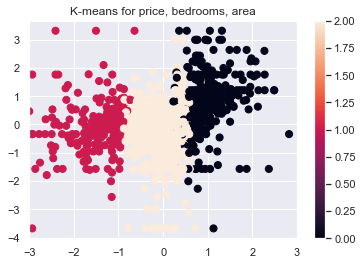

In [96]:
def kmeans(input_data, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(input_data)
    km = KMeans(n_clusters=n_clusters)
    km.fit(input_data)
    y_pred = km.predict(input_data)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    scatter = ax.scatter(X[:,0], X[:,1],c=y_pred, s=50)
    ax.set_xlim(-3,3)
    # ax.set_xlabel(input_data.columns[0])
    # ax.set_ylabel(input_data.columns[1])
    ax.set_title("K-means for price, bedrooms, area")
    plt.colorbar(scatter)
    print('distance of each model from its centroid: ',km.inertia_)
    return y_pred, km.cluster_centers_
labels, centroids = kmeans(data_new_choose,3)

In [97]:
data_new_choose['kmeans_all'] = labels

print('cluster 1')
data_new_choose[data_new_choose['kmeans_all'] == 0].describe()

cluster 1


<ipython-input-97-640cdb9687b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_choose['kmeans_all'] = labels


,price,bedrooms,area,kmeans_all
count,433.000000,433.000000,433.000000,433.0
mean,16.646935,1.432421,5.469396,0.0
std,0.610063,0.304049,0.780337,0.0
min,15.552858,0.000000,4.348645,0.0
25%,16.257858,1.268825,4.981507,0.0
50%,16.499665,1.415175,5.296227,0.0
75%,16.846613,1.589027,5.703534,0.0
max,19.519293,2.302585,11.338572,0.0


In [98]:
print('cluster 2')
data_new_choose[data_new_choose['kmeans_all'] == 1].describe()

cluster 2


,price,bedrooms,area,kmeans_all
count,244.000000,244.000000,244.000000,244.0
mean,12.479395,1.148382,5.194530,1.0
std,1.290438,0.327064,0.692495,0.0
min,9.104980,0.000000,3.677021,1.0
25%,11.832371,0.982166,4.778659,1.0
50%,12.908462,1.155697,5.029620,1.0
75%,13.463874,1.302885,5.521461,1.0
max,14.220976,2.302585,9.257995,1.0


In [99]:
print('cluster 3')
data_new_choose[data_new_choose['kmeans_all'] == 2].describe()

cluster 3


,price,bedrooms,area,kmeans_all
count,843.000000,843.000000,843.000000,843.0
mean,15.247328,1.115157,4.767855,2.0
std,0.576541,0.286949,0.387119,0.0
min,13.830814,0.000000,3.218876,2.0
25%,14.872429,0.993267,4.531096,2.0
50%,15.322977,1.131028,4.753933,2.0
75%,15.711830,1.280913,4.953770,2.0
max,16.300417,2.197225,6.668620,2.0


Kmeans of price, bedrooms, area for Islamabd
distance of each model from its centroid:  318.98088932205155


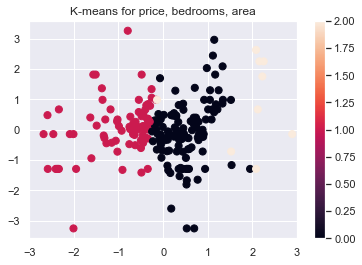

In [100]:
print("Kmeans of price, bedrooms, area for Islamabd")
labels, centroids = kmeans(data_isl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],3)

Kmeans of price, bedrooms, area for Lahore
distance of each model from its centroid:  197.05242255385767


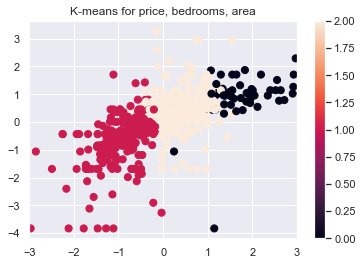

In [101]:
print("Kmeans of price, bedrooms, area for Lahore")
labels, centroids = labels, centroids = kmeans(data_lhr.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],3)

Kmeans of price, bedrooms, area for Lahore
distance of each model from its centroid:  197.05242255385767


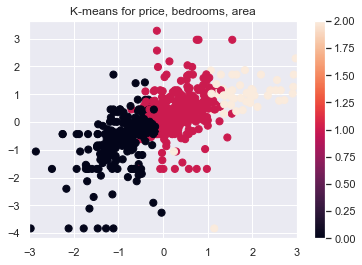

In [102]:
print("Kmeans of price, bedrooms, area for Lahore")
labels, centroids = labels, centroids = kmeans(data_lhr.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],3)

Kmeans of price, bedrooms, area for Faislabad
distance of each model from its centroid:  207.67487395030358


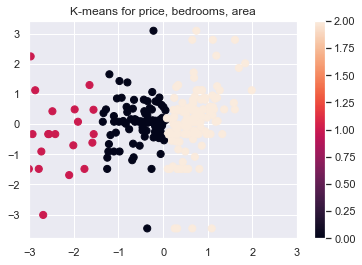

In [103]:
print("Kmeans of price, bedrooms, area for Faislabad")
labels, centroids = kmeans(data_fsl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],3)

Kmeans of price, bedrooms, area for Karachi
distance of each model from its centroid:  144.28021418538663


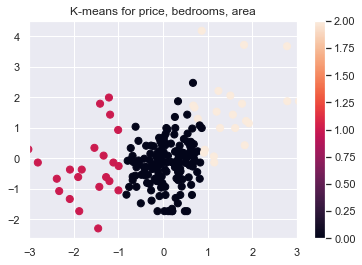

In [104]:
df_khi_group_choose = data_khi.groupby('unique_location').mean()[['price', 'bedrooms', 'area']]
print("Kmeans of price, bedrooms, area for Karachi")
labels, centroids = kmeans(df_khi_group_choose,3)

In [105]:
df_khi_group_choose['kmeans_khi'] = labels
print('cluster 1')
df_khi_group_choose[df_khi_group_choose['kmeans_khi'] == 0].describe()

cluster 1


,price,bedrooms,area,kmeans_khi
count,152.000000,152.000000,152.000000,152.0
mean,15.342165,1.088014,4.931977,0.0
std,0.528525,0.190252,0.371800,0.0
min,14.203977,0.693147,4.161661,0.0
25%,15.019713,0.973025,4.653999,0.0
50%,15.317128,1.098612,4.847498,0.0
75%,15.747671,1.192432,5.181236,0.0
max,16.300417,1.762756,6.108081,0.0


In [106]:
print('cluster 2')
df_khi_group_choose[df_khi_group_choose['kmeans_khi'] == 1].describe()

cluster 2


,price,bedrooms,area,kmeans_khi
count,25.000000,25.000000,25.000000,25.0
mean,12.855255,1.057694,5.251657,1.0
std,1.116881,0.266908,0.949413,0.0
min,9.680344,0.549306,3.806662,1.0
25%,12.331040,0.895880,4.796489,1.0
50%,13.312148,1.039721,5.023794,1.0
75%,13.716192,1.156149,5.404927,1.0
max,13.985990,1.640382,8.699515,1.0


In [107]:
print('cluster 3')
df_khi_group_choose[df_khi_group_choose['kmeans_khi'] == 2].describe()

cluster 3


,price,bedrooms,area,kmeans_khi
count,22.000000,22.000000,22.000000,22.0
mean,17.108914,1.529073,5.598424,2.0
std,0.840968,0.293172,0.526584,0.0
min,16.065915,1.098612,4.553877,2.0
25%,16.448940,1.386294,5.216829,2.0
50%,16.954530,1.510064,5.581891,2.0
75%,17.492393,1.609438,5.980822,2.0
max,19.008467,2.197225,6.856462,2.0


[ 0  1 -1 ...  1  1  1]


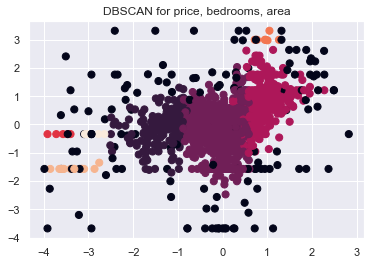

In [108]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, s=50)
    plt.title("DBSCAN for price, bedrooms, area")
    return y_pred
db_label = dbscan(data_new_choose,.5,5)
print(db_label)

In [109]:
data_new_choose['dbscan_cluster'] = db_label

print('cluster 1')
data_new_choose[data_new_choose['dbscan_cluster'] == -1].describe()

cluster 1


<ipython-input-109-23cf993f4759>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_choose['dbscan_cluster'] = db_label


,price,bedrooms,area,kmeans_all,dbscan_cluster
count,136.000000,136.000000,136.000000,136.000000,136.0
mean,14.531287,1.168657,5.755399,0.845588,-1.0
std,2.794199,0.696454,1.440976,0.768632,0.0
min,9.104980,0.000000,3.218876,0.000000,-1.0
25%,11.919973,0.693147,4.645857,0.000000,-1.0
50%,15.017840,1.177752,5.558101,1.000000,-1.0
75%,16.554852,1.775487,6.532316,1.000000,-1.0
max,19.519293,2.302585,11.338572,2.000000,-1.0


In [110]:
data_new_choose['dbscan_cluster'] = db_label

print('cluster 2')
data_new_choose[data_new_choose['dbscan_cluster'] == -0].describe()

cluster 2


<ipython-input-110-6ed445f5ba28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_choose['dbscan_cluster'] = db_label


,price,bedrooms,area,kmeans_all,dbscan_cluster
count,169.000000,169.000000,169.000000,169.0,169.0
mean,13.088078,1.169219,5.158121,1.0,0.0
std,0.616501,0.196702,0.479011,0.0,0.0
min,11.359711,0.650678,4.233175,1.0,0.0
25%,12.664557,1.052389,4.812626,1.0,0.0
50%,13.205909,1.191490,5.023794,1.0,0.0
75%,13.608236,1.276925,5.463851,1.0,0.0
max,14.042737,1.640382,6.586430,1.0,0.0


In [111]:
data_new_choose['dbscan_cluster'] = db_label

print('cluster 3')
data_new_choose[data_new_choose['dbscan_cluster'] == 1].describe()

cluster 3


<ipython-input-111-8d7323a0baac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_choose['dbscan_cluster'] = db_label


,price,bedrooms,area,kmeans_all,dbscan_cluster
count,812.000000,812.000000,812.000000,812.0,812.0
mean,15.253997,1.131006,4.772566,2.0,1.0
std,0.575185,0.231824,0.356817,0.0,0.0
min,13.830814,0.396084,3.768182,2.0,1.0
25%,14.888447,1.014040,4.539713,2.0,1.0
50%,15.338518,1.133732,4.762613,2.0,1.0
75%,15.717105,1.279719,4.953545,2.0,1.0
max,16.191286,1.879846,6.156490,2.0,1.0


In [112]:
data_new_choose['dbscan_cluster'] = db_label

print('cluster 4')
data_new_choose[data_new_choose['dbscan_cluster'] == 2].describe()

cluster 4


<ipython-input-112-d28b9d702744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_choose['dbscan_cluster'] = db_label


,price,bedrooms,area,kmeans_all,dbscan_cluster
count,374.000000,374.000000,374.000000,374.0,374.0
mean,16.558551,1.420203,5.299949,0.0,2.0
std,0.453200,0.213346,0.439753,0.0,0.0
min,15.552858,0.879528,4.348645,0.0,2.0
25%,16.253876,1.271391,4.953652,0.0,2.0
50%,16.461911,1.393858,5.221342,0.0,2.0
75%,16.764777,1.551971,5.565972,0.0,2.0
max,18.683045,2.079442,6.745236,0.0,2.0


In [113]:
data_new_choose['dbscan_cluster'] = db_label

print('cluster 5')
data_new_choose[data_new_choose['dbscan_cluster'] == 3].describe()

cluster 5


<ipython-input-113-6dd0b2738689>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_choose['dbscan_cluster'] = db_label


,price,bedrooms,area,kmeans_all,dbscan_cluster
count,5.000000,5.000000,5.000000,5.0,5.0
mean,9.672808,1.098612,4.914670,1.0,3.0
std,0.317949,0.000000,0.145783,0.0,0.0
min,9.210340,1.098612,4.828314,1.0,3.0
25%,9.510445,1.098612,4.828314,1.0,3.0
50%,9.740969,1.098612,4.828314,1.0,3.0
75%,9.903488,1.098612,4.923624,1.0,3.0
max,9.998798,1.098612,5.164786,1.0,3.0


In [114]:
data_new_choose['dbscan_cluster'] = db_label

print('cluster 6')
data_new_choose[data_new_choose['dbscan_cluster'] == 4].describe()

cluster 6


<ipython-input-114-59f17f3969cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_choose['dbscan_cluster'] = db_label


,price,bedrooms,area,kmeans_all,dbscan_cluster
count,7.000000,7.000000,7.000000,7.0,7.0
mean,16.668600,2.211353,5.337587,0.0,4.0
std,0.275395,0.040302,0.236360,0.0,0.0
min,16.300417,2.190761,4.959342,0.0,4.0
25%,16.514592,2.197225,5.188312,0.0,4.0
50%,16.677711,2.197225,5.367449,0.0,4.0
75%,16.771594,2.197225,5.521461,0.0,4.0
max,17.129697,2.302585,5.616771,0.0,4.0


DBSCAN of price, bedrooms, area for Islamabd


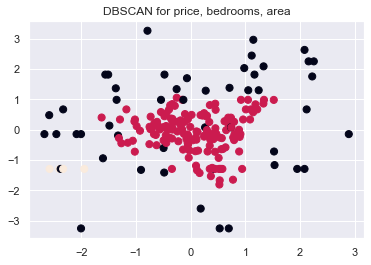

In [115]:
print("DBSCAN of price, bedrooms, area for Islamabd")
db_label = dbscan(data_isl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],.5,5)

DBSCAN of price, bedrooms, area for Lahore


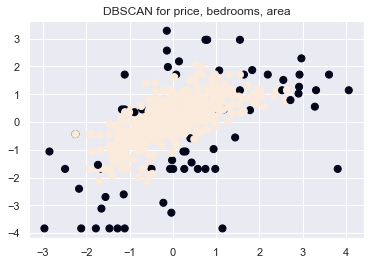

In [116]:
print("DBSCAN of price, bedrooms, area for Lahore")
db_label = dbscan(data_lhr.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],.5,5)

DBSCAN of price, bedrooms, area for Faislabad


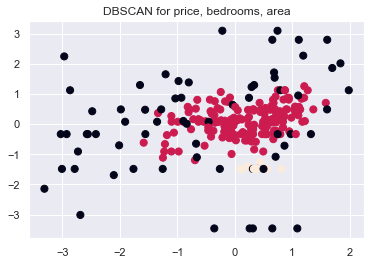

In [117]:
print("DBSCAN of price, bedrooms, area for Faislabad")
db_label = dbscan(data_fsl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],.5,5)

DBSCAN of price, bedrooms, area for Rawalpindi


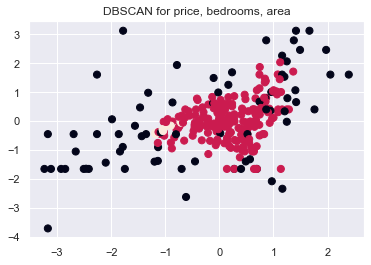

In [118]:
print("DBSCAN of price, bedrooms, area for Rawalpindi")
db_label = dbscan(data_rwl.groupby('unique_location').mean()[['price', 'bedrooms', 'area']],.5,5)

DBSCAN of price, bedrooms, area for Karachi


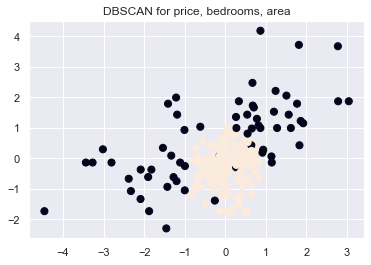

In [119]:
print("DBSCAN of price, bedrooms, area for Karachi")
db_label = dbscan(df_khi_group_choose,.5,5)

In [120]:
df_khi_group_choose['db_clusters'] = db_label

print('cluster 1')
df_khi_group_choose[df_khi_group_choose['db_clusters'] == -1].describe()

cluster 1


,price,bedrooms,area,kmeans_khi,db_clusters
count,61.000000,61.000000,61.000000,61.000000,61.0
mean,15.032113,1.294557,5.279214,1.131148,-1.0
std,2.110733,0.339405,0.793623,0.763226,0.0
min,9.680344,0.549306,3.806662,0.000000,-1.0
25%,13.468937,1.069265,4.787492,1.000000,-1.0
50%,15.563764,1.339809,5.187773,1.000000,-1.0
75%,16.638298,1.497866,5.798403,2.000000,-1.0
max,19.008467,2.197225,8.699515,2.000000,-1.0


In [121]:
print('cluster 2')
df_khi_group_choose[df_khi_group_choose['db_clusters'] == 0].describe()

cluster 2


,price,bedrooms,area,kmeans_khi,db_clusters
count,138.000000,138.000000,138.000000,138.0,138.0
mean,15.310345,1.061537,4.942647,0.0,0.0
std,0.519290,0.163722,0.336308,0.0,0.0
min,14.203977,0.693147,4.305425,0.0,0.0
25%,14.995637,0.962836,4.711069,0.0,0.0
50%,15.284562,1.095866,4.856689,0.0,0.0
75%,15.702063,1.174161,5.184322,0.0,0.0
max,16.257858,1.386294,5.911881,0.0,0.0
